<b><u>前準備</u></b>  
scikit-learnに同梱されているワインのデータセットをインポートして変数dataに格納する。  
ワインのデータセットは13種類の特徴量からなる。

In [12]:
from sklearn.datasets import load_wine
data = load_wine()

特徴量(alchol, color_intensity)をXに代入する

In [14]:
X = data.data[:, [0, 9]]

表にして可視化してみる

In [15]:
import pandas as pd
datas = pd.DataFrame(data=data.data,columns=data.feature_names)
datas.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<b><u>実装方法</u></b>  
k-means法を使ってクラスタリングを実行する。  
学習前モデルmodelのfit_predictメソッドに特徴量データを代入し、学習と予測を同時に行う。

In [16]:
from sklearn.cluster import KMeans
n_clusters = 3
model = KMeans(n_clusters=n_clusters)
pred = model.fit_predict(X)

<b><u>結果の確認(可視化)</u></b>  

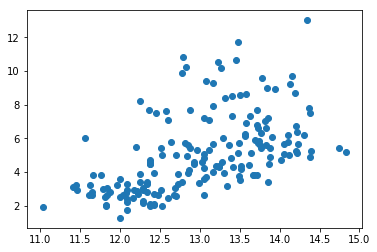

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_axis = data.data[:, [0]]
y_axis = data.data[:, [9]]
plt.scatter(x_axis, y_axis)

pandasを利用してクラスタリングの結果で色分けを行う。

In [41]:
datas["k-means"] = pred

In [42]:
datas.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,k-means
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


In [53]:
datas_0 = datas[datas["k-means"] == 0]
datas_1 = datas[datas["k-means"] == 1]
datas_2 = datas[datas["k-means"] == 2]

重心の追加

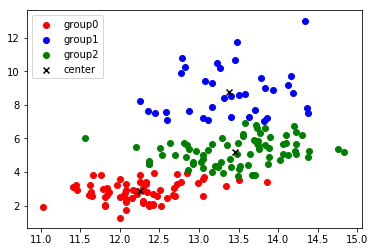

In [80]:
plt.scatter(datas_0["alcohol"], datas_0["color_intensity"],  c = "red", label = "group0")
plt.scatter(datas_1["alcohol"], datas_1["color_intensity"],  c = "blue", label = "group1")
plt.scatter(datas_2["alcohol"], datas_2["color_intensity"],  c = "green", label = "group2")

centers = model.cluster_centers_
plt.scatter(centers[0,0], centers[0,1], marker = "x", c = "black", label = "center")
plt.scatter(centers[1,0], centers[1,1], marker = "x", c = "black")
plt.scatter(centers[2,0], centers[2,1], marker = "x", c = "black")

plt.legend()
plt.show()

念の為、欠損値の確認

In [60]:
datas.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
k-means                         0
dtype: int64